<a href="https://colab.research.google.com/github/Sweta-Das/KNN-Imputation-Method/blob/main/KNN_Imputation_with_Horse_Colic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### KNN Imputation using KNNImputer from Scikit Learn

The horse colic dataset describes medical characteristics of horses with colic and whether they lived or died.<br/>
The dataset contains 300 rows & 26 input variables. It's a binary classification prediction. If the horse lived, it'll predict '1', else '2'.

In [ ]:
# importing libraries
import numpy as np
import pandas as pd

# importing KNN Imputer Class from scikit learn
from sklearn.impute import KNNImputer

In [ ]:
# loading dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = pd.read_csv(url, header=None, na_values='?')

In [ ]:
# summarizing the first few rows
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


We get to see there are various 'NaN' in the dataset. The loaded data replaced '?' with NaN.

Enumerating each column and reporting the number of rows with missing values for the column.

In [ ]:
# summarizing number of rows with missing values for each column
for i in range(dataframe.shape[1]):

  # counting number of rows with missing values
  n_miss = dataframe[[i]].isnull().sum()
  perc = n_miss / dataframe.shape[0] * 100
  print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 1 (0.3%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 60 (20.0%)
> 4, Missing: 24 (8.0%)
> 5, Missing: 58 (19.3%)
> 6, Missing: 56 (18.7%)
> 7, Missing: 69 (23.0%)
> 8, Missing: 47 (15.7%)
> 9, Missing: 32 (10.7%)
> 10, Missing: 55 (18.3%)
> 11, Missing: 44 (14.7%)
> 12, Missing: 56 (18.7%)
> 13, Missing: 104 (34.7%)
> 14, Missing: 106 (35.3%)
> 15, Missing: 247 (82.3%)
> 16, Missing: 102 (34.0%)
> 17, Missing: 118 (39.3%)
> 18, Missing: 29 (9.7%)
> 19, Missing: 33 (11.0%)
> 20, Missing: 165 (55.0%)
> 21, Missing: 198 (66.0%)
> 22, Missing: 1 (0.3%)
> 23, Missing: 0 (0.0%)
> 24, Missing: 0 (0.0%)
> 25, Missing: 0 (0.0%)
> 26, Missing: 0 (0.0%)
> 27, Missing: 0 (0.0%)


This shows a list of all columns in the dataset and the number and percentage of missing values.<br/>
Close inspection shows that Column indexes 1 & 2 have no missing values, and other columns like 15 and 21 have many missing values.

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       299 non-null    float64
 1   1       300 non-null    int64  
 2   2       300 non-null    int64  
 3   3       240 non-null    float64
 4   4       276 non-null    float64
 5   5       242 non-null    float64
 6   6       244 non-null    float64
 7   7       231 non-null    float64
 8   8       253 non-null    float64
 9   9       268 non-null    float64
 10  10      245 non-null    float64
 11  11      256 non-null    float64
 12  12      244 non-null    float64
 13  13      196 non-null    float64
 14  14      194 non-null    float64
 15  15      53 non-null     float64
 16  16      198 non-null    float64
 17  17      182 non-null    float64
 18  18      271 non-null    float64
 19  19      267 non-null    float64
 20  20      135 non-null    float64
 21  21      102 non-null    float64
 22  22

In [ ]:
# splitting dataset into input & output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23] # 23 column isn't included because it's the surgical result i.e., output for prediciton

# for i in range(data.shape[1]):
#   if i != 23
#   ix.append(i)

X, y = data[:, ix], data[:, 23]

In [ ]:
data.shape[1]
type(data)
ix

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 24,
 25,
 26,
 27]

In [ ]:
# printing total missing
print('Missing: %d' %sum(np.isnan(X).flatten()))

Missing: 1605


The default distance metric in KNNImputer is a Euclidean distance i.e., NaN aware (meaning, it won't include NaN values while calculating the distance between dataset members).<br/>
By default, the no. of neighbors (k) = 5. <br/>
All distance are weighted uniformly, none has more preference than other.

In [ ]:
# defining imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [ ]:
# fitting imputer on the dataset
imputer.fit(X)

KNNImputer()

In [ ]:
# transforming the dataset
Xtrans = imputer.transform(X)

In [ ]:
# Printing total missing
print('Missing: %d' % sum(np.isnan(Xtrans).flatten()))

Missing: 0


## KNNImputer & Model Evaluation

Evaluating ML models on a dataset using k-fold cross validation.

K-fold cross validation: https://machinelearningmastery.com/k-fold-cross-validation/

To correctly apply KNN imputation for missing data and avoiding data leakage, the models should be calculated for each column on the training dataset. Then, applied to the train & test sets.

This is done by creating a modeling pipeline:<br/>
1st step : KNN imputation <br/>
2nd step : Model <br/>
This is done by the Pipeline class which uses KNNImputer with the default strategy, followed by a random forest model.

In [ ]:
# Evaluating KNN imputation and random forest for the horse colic dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

In [ ]:
# loading dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = pd.read_csv(url, header=None, na_values='?')

In [ ]:
# splitting data into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

In [ ]:
# defining modeling pipeline
model = RandomForestClassifier()
imputer = KNNImputer()
pipeline = Pipeline(steps = [('i', imputer), ('m', model)])

In [ ]:
# defining model evaluation
CV = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

For RepeatedStratifiedKFold() reference: https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/

In [ ]:
# evaluating model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=CV, n_jobs=-1, error_score='raise')
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.864 (0.054)


For cross validation ref: https://www.geeksforgeeks.org/cross-validation-machine-learning/#:~:text=Cross%2Dvalidation%20is%20a%20technique,data%2Dset%20train%20the%20model.
<br/>
For cross_val_score() ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

### KNN Imputer & Different Number of Neighbors

Key hyperparameter for the KNN algo. is "k"; the number of nearest neighbors that contribute to the prediction.<br/>
Here, we'll test different values for k and evaluage the model pipeline.

In [ ]:
# Evaluating KNN imputation and random forest for the horse colic dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

In [ ]:
# loading dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = pd.read_csv(url, header=None, na_values='?')

In [ ]:
# splitting data into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

In [ ]:
# evaluating each strategy on the dataset
results = list()
strategies = [np.str_(i) for i in [1,3,5,7,9,15,18,21]]
for s in strategies:

  # creating the modeling pipeline
  pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors = int(s))), ('m', RandomForestClassifier())])

  # evaluating the model
  cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
  scores = cross_val_score(pipeline, X, y, scoring = 'accuracy', cv = cv, n_jobs = -1)

  # storing results
  results.append(scores)
  print('>%s %.3f (%.3f)' % (s, np.mean(scores), np.std(scores)))

<ipython-input-20-eb093b3d7a96>:3: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  strategies = [np.str(i) for i in [1,3,5,7,9,15,18,21]]


>1 0.856 (0.056)
>3 0.864 (0.052)
>5 0.867 (0.049)
>7 0.863 (0.053)
>9 0.863 (0.053)
>15 0.867 (0.052)
>18 0.858 (0.052)
>21 0.862 (0.053)


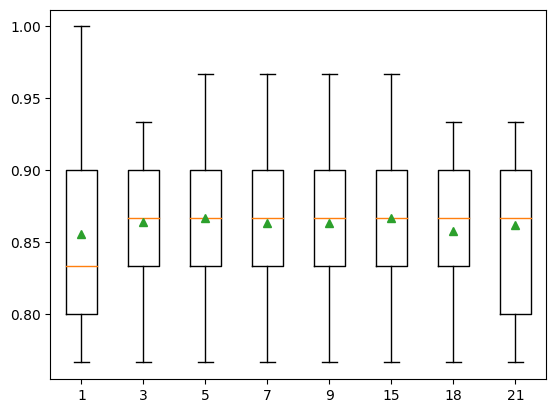

In [ ]:
# plotting model performance for comparison
from matplotlib import pyplot
pyplot.boxplot(results, labels = strategies, showmeans=True)
pyplot.show()

### KNN Imputer Transform When Making a Prediction

Creating a final modeling pipeline with the nearest neighbor imputation & random forest algorithm. Then making a prediction for new data.

In [8]:
import numpy as np
from numpy import nan
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline

In [3]:
# loading dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = pd.read_csv(url, header = None, na_values = '?')

In [4]:
# splitting data into input & output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

In [5]:
# creating the modeling pipeline
pipeline = Pipeline(steps = [('i', KNNImputer(n_neighbors = 21)), ('m', RandomForestClassifier())])

In [6]:
# fitting the model
pipeline.fit(X, y)

Pipeline(steps=[('i', KNNImputer(n_neighbors=21)),
                ('m', RandomForestClassifier())])

In [9]:
# defining new data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, nan, 2, 5, 4, 4, nan, nan, nan, 3, 5, 45.00, 8.40, nan, nan, 2, 11300, 00000, 00000, 2]

In [10]:
# making a prediction
yhat = pipeline.predict([row])

In [11]:
# summarizing prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2


A new row of data is defined with missing values marked with NaNs and a classification prediction is made.

In [12]:
dataframe

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,1,533886,NaN,120.0,70.0,4.0,NaN,4.0,2.0,...,55.0,65.0,NaN,NaN,3.0,2,3205,0,0,2
296,2.0,1,527702,37.2,72.0,24.0,3.0,2.0,4.0,2.0,...,44.0,NaN,3.0,3.3,3.0,1,2208,0,0,1
297,1.0,1,529386,37.5,72.0,30.0,4.0,3.0,4.0,1.0,...,60.0,6.8,NaN,NaN,2.0,1,3205,0,0,2
298,1.0,1,530612,36.5,100.0,24.0,3.0,3.0,3.0,1.0,...,50.0,6.0,3.0,3.4,1.0,1,2208,0,0,1


In [13]:
yhat

array([2.])